# Lab | Customer Analysis Round 3

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions

df= pd.read_csv('marketing_customer_analysis_clean.csv')

df= df.drop(columns=['unnamed:_0'])  #dropping the unnamed column
display(df.duplicated().sum()) #checking  for duplicated values
df= functions.remove_full_nulls(df) #removing nan rows
df= functions.duplicate_checking(df) #removing duplicate rows

443

In [2]:
# Show dataframe info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10467 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10467 non-null  object 
 1   state                          10467 non-null  object 
 2   customer_lifetime_value        10467 non-null  float64
 3   response                       10467 non-null  object 
 4   coverage                       10467 non-null  object 
 5   education                      10467 non-null  object 
 6   effective_to_date              10467 non-null  object 
 7   employmentstatus               10467 non-null  object 
 8   gender                         10467 non-null  object 
 9   income                         10467 non-null  int64  
 10  location_code                  10467 non-null  object 
 11  marital_status                 10467 non-null  object 
 12  monthly_premium_auto           10467 non-null  int6

None

In [3]:
# Describe DataFrame
display(df.describe())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000
mean,8028.822791,37526.678131,93.483711,15.132310,48.127544,0.384896,2.972294,436.993389,1.465941
std,6899.090509,30365.287470,34.665886,9.786773,27.923116,0.887489,2.394895,293.116709,0.498862
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,273.791318,1.000000
50%,5780.182197,33806.000000,83.000000,15.000000,48.000000,0.000000,2.000000,384.014030,1.000000
75%,9015.867430,62243.500000,109.000000,23.000000,71.000000,0.384256,4.000000,551.784942,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


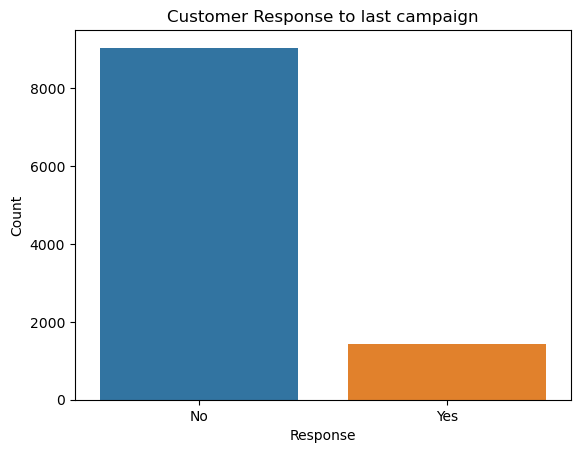

In [4]:
# Show a plot of the total number of responses
fig, ax = plt.subplots()
sns.countplot(data=df, x="response")
ax.set_xlabel("Response")
ax.set_ylabel("Count")
ax.set_title("Customer Response to last campaign")
plt.show()

,Sales channel,Customers Responded Yes,Customers Responded No
0,Agent,725,3239
1,Branch,320,2590
2,Call Center,211,1835
3,Web,175,1372


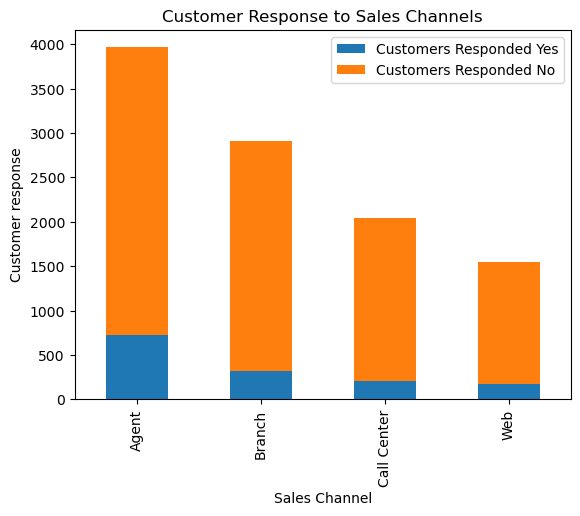

In [5]:
# Show a plot of the response rate by the sales channel.
piv= df.pivot_table(index=['sales_channel'], values= ['response'], aggfunc=[lambda x: (x == 'Yes').sum(), lambda x: (x == 'No').sum()])
piv =piv.reset_index()
piv.columns=['Sales channel', 'Customers Responded Yes' , 'Customers Responded No']
display(piv)

# Plotting on the same plot
ax= piv.plot(x='Sales channel', kind='bar', stacked=True)
ax.set_xlabel("Sales Channel")
ax.set_ylabel('Customer response')
ax.set_title("Customer Response to Sales Channels")
plt.show()



In [6]:
# Show a plot of the response rate by the total claim amount.


In [7]:
# Show a plot of the response rate by income.

# Lab | Data Transformations

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
  
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column `total_claim_amount`. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.

- Plot the heatmap of the correlation matrix after the filtering.


In [8]:
#checking datatype of the columns:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10467 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10467 non-null  object 
 1   state                          10467 non-null  object 
 2   customer_lifetime_value        10467 non-null  float64
 3   response                       10467 non-null  object 
 4   coverage                       10467 non-null  object 
 5   education                      10467 non-null  object 
 6   effective_to_date              10467 non-null  object 
 7   employmentstatus               10467 non-null  object 
 8   gender                         10467 non-null  object 
 9   income                         10467 non-null  int64  
 10  location_code                  10467 non-null  object 
 11  marital_status                 10467 non-null  object 
 12  monthly_premium_auto           10467 non-null  int6

None

In [9]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals
dfnum = df.select_dtypes(include=[np.number])
dfcat = df.select_dtypes(include=[object])
display(dfnum.head())
display(dfcat.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A


C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


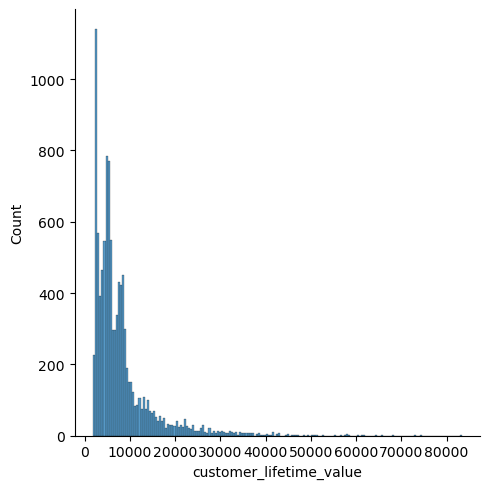

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


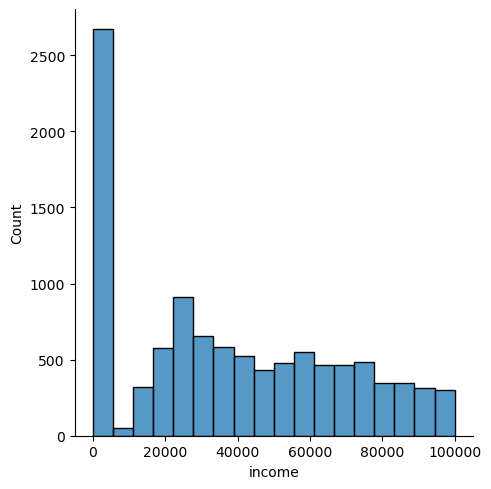

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


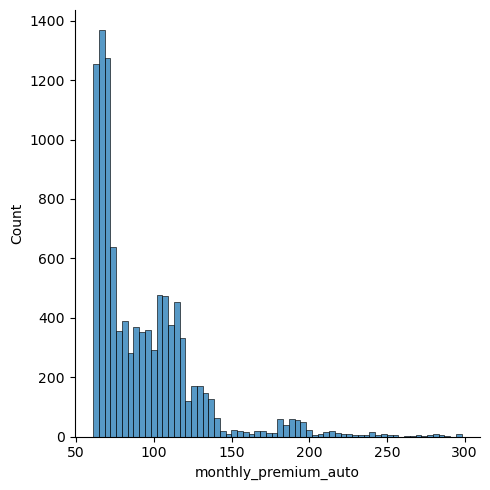

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


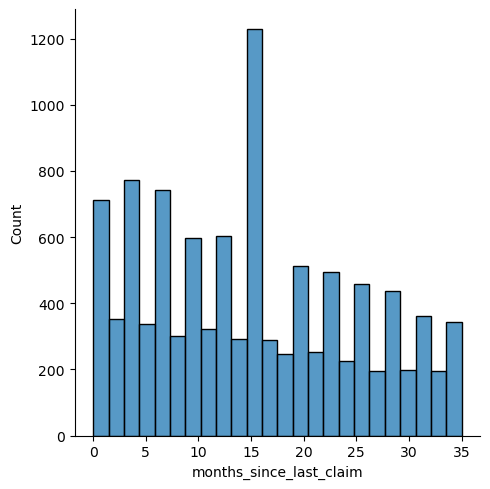

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


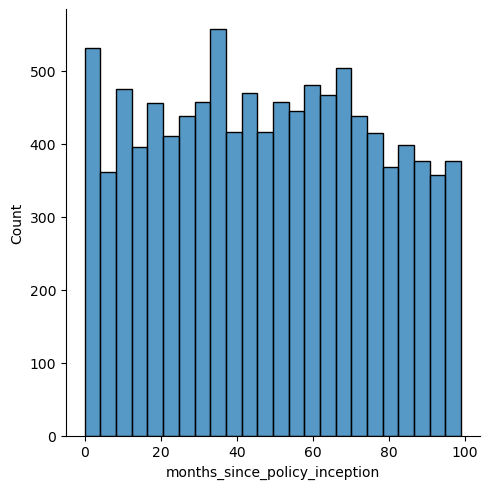

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


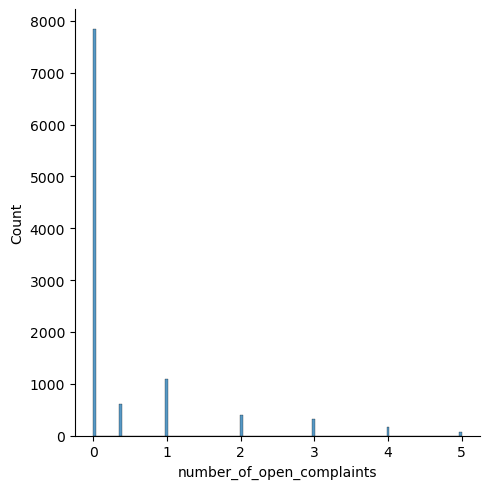

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


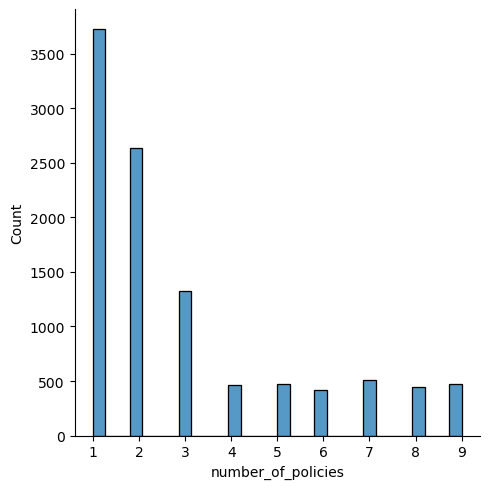

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


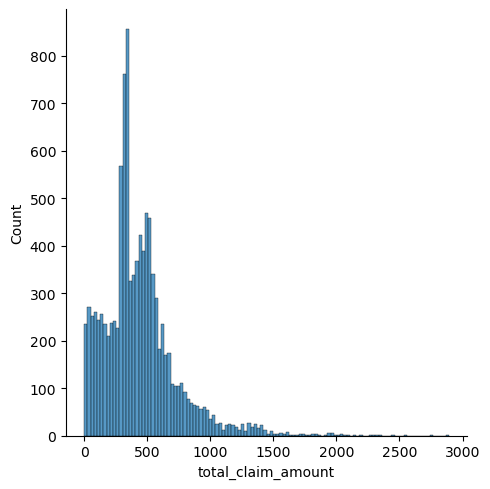

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


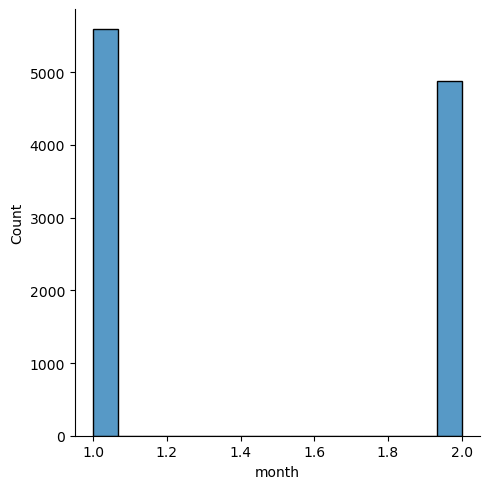

In [10]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables

for col in dfnum.columns:
    sns.displot(dfnum[col])
    plt.show()


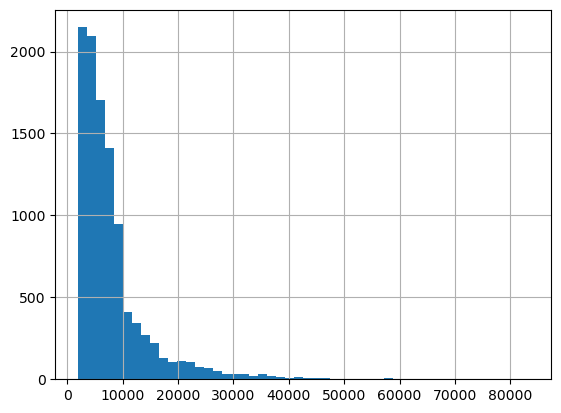

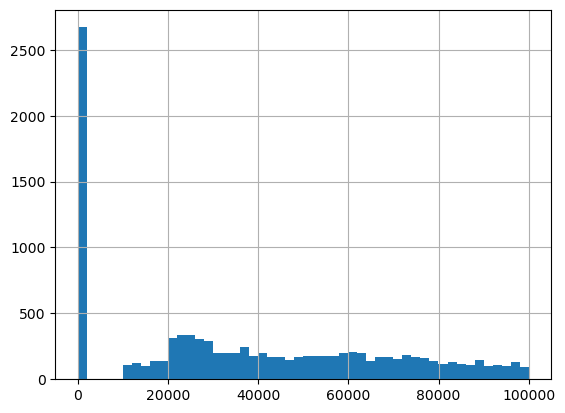

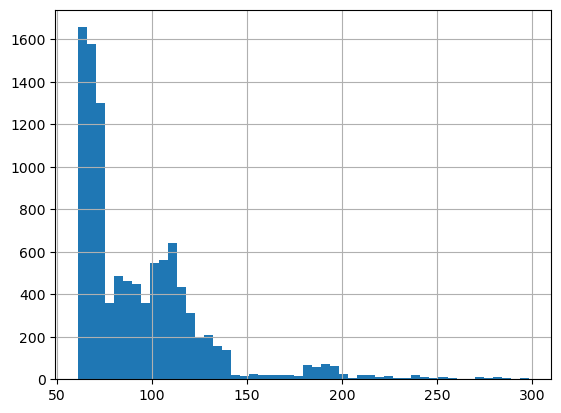

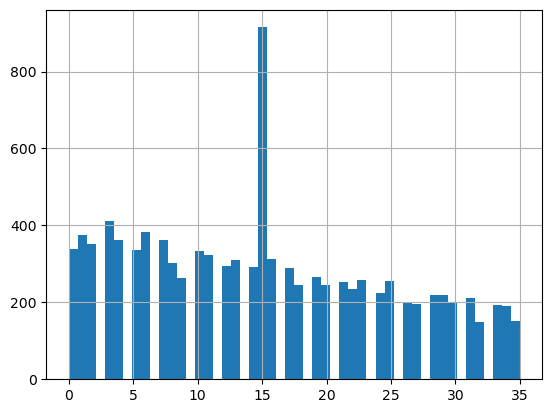

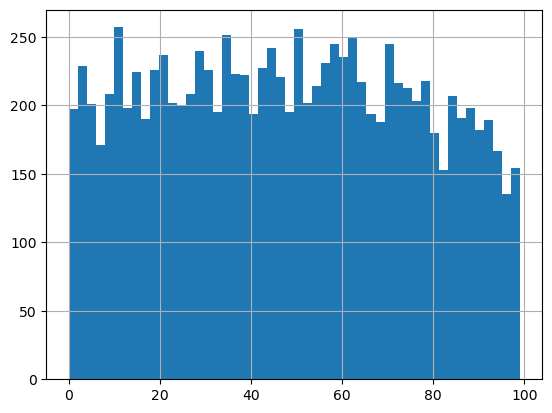

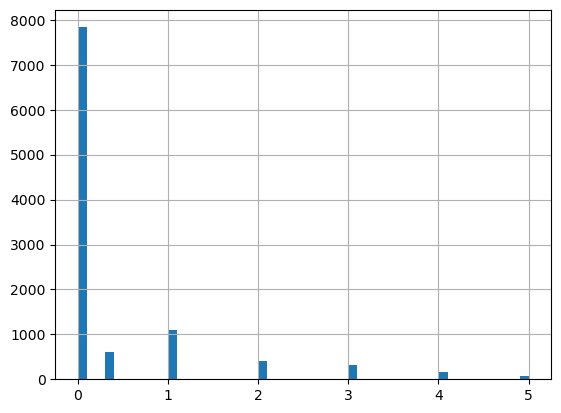

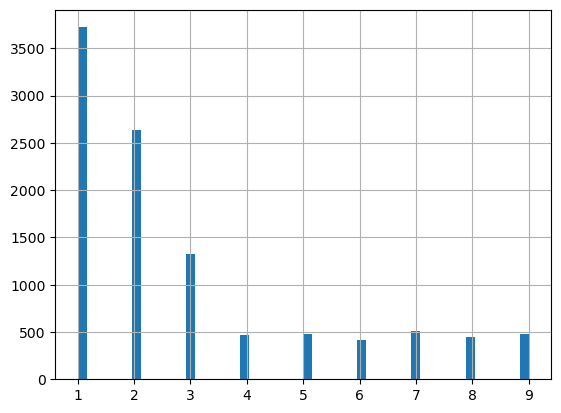

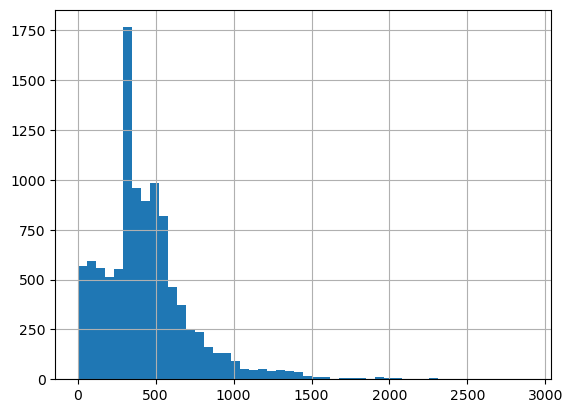

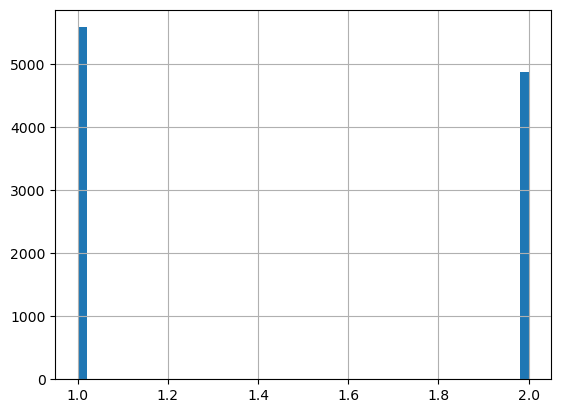

In [11]:
#Use Matplotlib to construct histograms

for col in dfnum.columns:
    dfnum[col].hist(bins=50)
    plt.show()


In [12]:
#Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
for col in dfnum.columns:
    print("the skewness for column" , col, "is" , dfnum[col].skew())

#The columns customer_lifetime_value, monthly_premium_auto, and number_of_open_complaints are heavily skewed
#income, months_since_last_claim, months_since_policy_inception and month are not very skewed
# the other columns are slightly skewed 


the skewness for column customer_lifetime_value is 3.011107248830641
the skewness for column income is 0.2892072448165412
the skewness for column monthly_premium_auto is 2.1098976821667836
the skewness for column months_since_last_claim is 0.2835827171395943
the skewness for column months_since_policy_inception is 0.03565757674804425
the skewness for column number_of_open_complaints is 2.8789036682215094
the skewness for column number_of_policies is 1.245527524116569
the skewness for column total_claim_amount is 1.7172058657261506
the skewness for column month is 0.1365744602154852


In [13]:
#For the numerical variables, check the multicollinearity between the features. 
correlation_matrix = dfnum.corr()
display(correlation_matrix) #there are no columns with correlation value >0.9

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.025472,0.404831,0.013641,0.017195,-0.034682,0.017978,0.233632,-0.009090
income,0.025472,1.000000,-0.012115,-0.024084,-0.001975,0.007520,-0.009242,-0.354877,-0.000954
monthly_premium_auto,0.404831,-0.012115,1.000000,0.007459,0.019195,-0.011809,-0.019262,0.633883,0.007674
months_since_last_claim,0.013641,-0.024084,0.007459,1.000000,-0.038630,0.003174,0.008846,0.010894,-0.020085
months_since_policy_inception,0.017195,-0.001975,0.019195,-0.038630,1.000000,0.001603,-0.013704,0.003013,0.014747
number_of_open_complaints,-0.034682,0.007520,-0.011809,0.003174,0.001603,1.000000,0.005497,-0.011151,-0.004917
number_of_policies,0.017978,-0.009242,-0.019262,0.008846,-0.013704,0.005497,1.000000,-0.008166,0.006568
total_claim_amount,0.233632,-0.354877,0.633883,0.010894,0.003013,-0.011151,-0.008166,1.000000,0.001433
month,-0.009090,-0.000954,0.007674,-0.020085,0.014747,-0.004917,0.006568,0.001433,1.000000


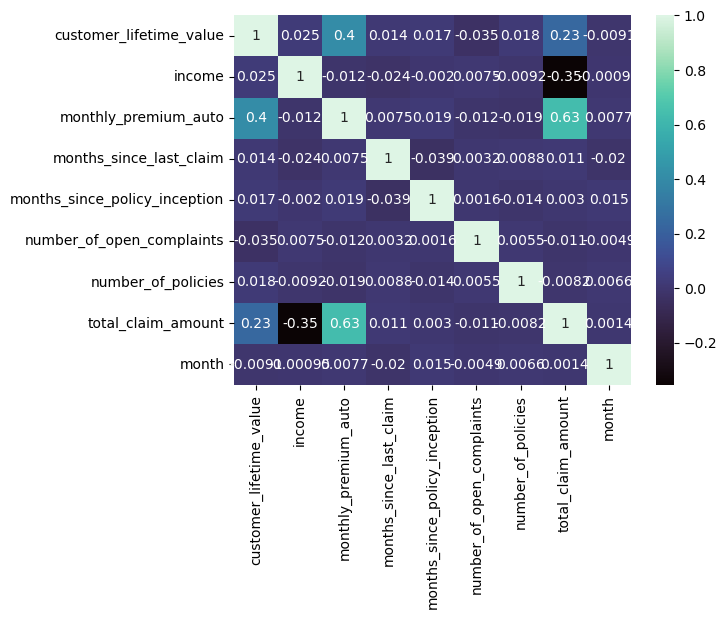

In [14]:
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap) 
plt.show()

# Lab | Model Generation and Validation

,Variable,VIF
0,customer_lifetime_value,1.197660
1,monthly_premium_auto,1.196950
2,months_since_last_claim,1.002308
3,months_since_policy_inception,1.002001
4,income,1.001857


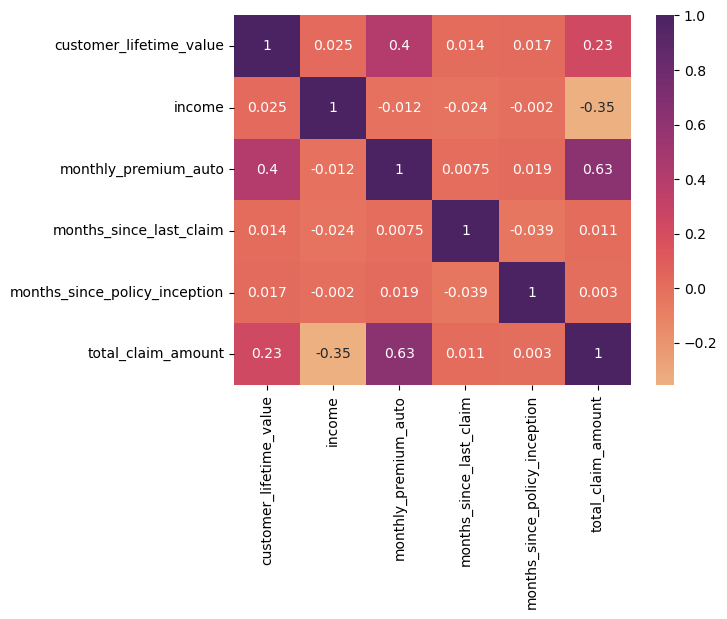

In [15]:
#Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity (see the previous lab)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Columns to consider
cols_to_drop= ['number_of_open_complaints','number_of_policies', 'month']
cont_col_df= dfnum.drop(columns=cols_to_drop)
selected_columns = list(cont_col_df.columns)
selected_columns.remove("total_claim_amount")

# compute vif
X_num = df.loc[:, selected_columns]
X_num.loc[:,'intercept'] = 1

# create dataframe to store vif values
vif = pd.DataFrame()
vif["Variable"] = X_num.columns
vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
display(vif)


#new heatmap after dropping discrete numerical columns
correlation_matrix2 = cont_col_df.corr()
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(correlation_matrix2, annot=True, cmap=cmap) 
plt.show()


#The columns do not suffer from multicollinearity as proven by the VIF and the heatmap previously.
#No columns need to be dropped

In [16]:
#Remove outliers
# defining a function to remove outliers of a given column
def remove_outliers (col: str, data: pd.DataFrame) -> pd.DataFrame:
    iqr = np.percentile(data[col],75) - np.percentile(data[col],25) #Q3-Q1
    upper_wisker = np.percentile(data[col],75) + 1.5*iqr
    lower_wisker = np.percentile(data[col],25) - 1.5*iqr
    data = data[(data[col]>lower_wisker) & (data[col]<upper_wisker)]
    return data

#creating a copy of the numerical dataframe
df_no_outliers= df.copy()

#calling the functions for each of the continuous columns of the dataframe
cols= ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception']
for col in cols:
    df_no_outliers=remove_outliers(col, df_no_outliers)
    
#display(df.describe())
display(df_no_outliers)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [17]:
#X-y split. (define which column you want to predict, and which ones you will use to make the prediction)
y = df_no_outliers['total_claim_amount']
X = df_no_outliers.drop(['total_claim_amount'], axis=1)
display(X)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A,1
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,0.000000,7,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,2.000000,1,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.000000,1,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,2


In [18]:
#Use the Train-test split to create the Train, and Test sets (make sure to set the random_state option to any integer number of your choice).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [19]:
#Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the previous step (make sure to use the columns= option to set the columns names to X.columns).
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)


#checking that the dataframe was split as intended
#display(X_train_df.shape)
#display(X_test_df.shape)
#display(X.shape)

In [20]:
#Split the X_train Pandas DataFrame into two: numerical, and categorical using df.select_dtypes().
X_num_train = X_train_df.select_dtypes(include = np.number)
X_cat_train = X_train_df.select_dtypes(include = object)

X_num_test= X_test_df.select_dtypes(include = np.number)
X_cat_test= X_test_df.select_dtypes(include = object)

In [21]:
#If you need to transform any column, Train your transformers and/or scalers all the numerical columns using the .fit() only in the Train set (only one transformer/scaler for all the columns, check here, and here using the .transform()
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
pt.fit(X_num_train)

PowerTransformer()

In [22]:
#Save all your transformers/scalers right after the .fit() using pickle using the code shown below:
import pickle
import os

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "power_transformer.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
  pickle.dump(pt, file) # Replace "variable" with the name of the variable that contains your transformer


In [23]:
#If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy arrays generated by the .transform() using the pd.DataFrame() function as you did earlier with the Numpy arrays generated by the train_test_split() function.
X_num_train_transformed = pt.transform(X_num_train)
X_num_test_transformed = pt.transform(X_num_test)

# We create new Pandas DataFrames out of the Numpy arrays.
X_num_train_transformed_df = pd.DataFrame(X_num_train_transformed, columns=X_num_train.columns, index=X_num_train.index) #transformed X train df numerical
X_num_test_transformed_df  = pd.DataFrame(X_num_test_transformed,  columns=X_num_train.columns, index=X_num_test.index) #transformed X test df numerical

In [24]:
# displaying the categorical columns to determine the proper encoder
display(X_cat_train)

# Identifying nominal and ordinal columns
nominal_columns = ['state', 'response','employmentstatus','gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_type']  # List of nominal column names or indices
ordinal_columns = ['coverage', 'education', 'vehicle_size']  # List of ordinal column names or indices


#checking the values of the ordinal columns:
X_cat_train['coverage'].value_counts(dropna=False)
X_cat_train['education'].value_counts(dropna=False)
X_cat_train['vehicle_size'].value_counts(dropna=False)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
4503,SA91515,California,No,Basic,Bachelor,2011-01-28,Unemployed,M,Suburban,Married,Personal Auto,Personal L1,Offer1,Call Center,SUV,Large,A
6440,WE52840,Arizona,No,Extended,College,2011-02-16,Employed,F,Rural,Divorced,Corporate Auto,Corporate L3,Offer1,Call Center,Four-Door Car,Medsize,A
4821,UF91715,Nevada,No,Premium,High School or Below,2011-01-22,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,A
10354,LX67597,Nevada,No,Basic,Bachelor,2011-01-02,Employed,M,Urban,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Small,A
9635,BW52697,California,No,Basic,College,2011-01-01,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,OL28568,California,No,Premium,Bachelor,2011-02-07,Employed,M,Suburban,Single,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Medsize,A
4297,IA78643,Washington,Yes,Basic,High School or Below,2011-01-02,Unemployed,F,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Web,Sports Car,Medsize,A
8748,GD11927,California,No,Basic,High School or Below,2011-02-25,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Agent,Four-Door Car,Small,A
3845,RA91280,Arizona,Yes,Extended,Doctor,2011-02-18,Employed,M,Rural,Divorced,Personal Auto,Personal L1,Offer2,Branch,Four-Door Car,Medsize,A


vehicle_size
Medsize    5230
Small      1375
Large       756
Name: count, dtype: int64

In [25]:
#Transform the categorical columns into numbers using a:
#OneHotEncoder for categorical nominal columns. 
#(again only use the .fit() in the Train set, but the .transform() in the Train and the Test sets)


# I will use OneHotEncoder for the nominal columns, and OrdinalEncoder for the ordinal columns
# I will combine both using a column transformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# adjusting the order for the ordinal encoder:
order = [['Basic', 'Extended', 'Premium'],['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'],['Small', 'Medsize', 'Large']]

# Fit and transform on the training data
transformers = [('nominal', OneHotEncoder(drop='first'), nominal_columns), ('ordinal', OrdinalEncoder(categories=order), ordinal_columns),]

# Applying the different transformers to the different columns
preprocessor = ColumnTransformer(transformers)
preprocessor.fit_transform(X_cat_train)

<7361x36 sparse matrix of type '<class 'numpy.float64'>'
	with 68997 stored elements in Compressed Sparse Row format>

In [26]:
#Remember to save all your transformers/scalers right after the .fit()
path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "column_transformer.pkl"
with open(path+filename, 'wb') as file:
    pickle.dump(preprocessor, file)

In [27]:
# Apply the transformations
X_cat_train_encoded_arr = preprocessor.fit_transform(X_cat_train).toarray()
X_cat_test_encoded_arr = preprocessor.fit_transform(X_cat_test).toarray()

X_cat_train_encoded_df = pd.DataFrame(X_cat_train_encoded_arr, columns=preprocessor.get_feature_names_out(), index=X_cat_train.index)
X_cat_test_encoded_df = pd.DataFrame(X_cat_test_encoded_arr,  columns=preprocessor.get_feature_names_out(), index=X_cat_test.index)

display(X_cat_train_encoded_df)


,nominal__state_California,nominal__state_Nevada,nominal__state_Oregon,nominal__state_Washington,nominal__response_Yes,nominal__employmentstatus_Employed,nominal__employmentstatus_Medical Leave,nominal__employmentstatus_Retired,nominal__employmentstatus_Unemployed,nominal__gender_M,...,nominal__renew_offer_type_Offer4,nominal__sales_channel_Branch,nominal__sales_channel_Call Center,nominal__sales_channel_Web,nominal__vehicle_class_SUV,nominal__vehicle_class_Sports Car,nominal__vehicle_class_Two-Door Car,ordinal__coverage,ordinal__education,ordinal__vehicle_size
4503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
6440,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4821,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
10354,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9635,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
4297,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8748,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3845,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0


In [28]:
# Use .replace() to cast into numbers any categorical ordinal column replacing each label with a number that: respects the order of the labels and the relative "distance"
# instead of replace() i used the ordinal encoder above

In [29]:
#Concat numerical_transformer and categorical_transfomed DataFrames using pd.concat().

#display(X_num_train_transformed_df)
#display(X_cat_train_encoded_df)
X_train_combined = pd.concat([X_num_train_transformed_df, X_cat_train_encoded_df], axis=1)
#display(X_train_combined)

#display(X_cat_test_encoded_df)
#display(X_num_test_transformed_df)
X_test_combined= pd.concat([X_num_test_transformed_df, X_cat_test_encoded_df], axis=1)
#display(X_test_combined)

In [30]:
# Apply another MinMaxScaler to the concatenated DataFrame.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_combined)

MinMaxScaler()

In [31]:
#Remember to save all your MinMaxScaler right after the .fit() using pickle using the code shown below:
path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "scaler.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
   pickle.dump(scaler, file) # Replace "variable" with the name of the variable that contains your transformer

In [32]:
# Applying the transformer to the train and test set
X_train_normalized = scaler.transform(X_train_combined)
X_test_normalized = scaler.transform(X_test_combined)

#converting the arrays to dataframes
X_train_normalized_df= pd.DataFrame(X_train_normalized, columns=X_train_combined.columns)
X_test_normalized_df= pd.DataFrame(X_test_normalized, columns=X_test_combined.columns)

#display(X_train_normalized_df)
#display(X_test_normalized_df)

In [33]:
#Apply linear regression to the Pandas DataFrame obtained in the previous step using sklearn
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_normalized_df, y_train) # If we has to transform y_train, we will use .fit(X_train_scaled_df, y_train_transformed)


LinearRegression()

In [34]:
#Remember to save your linear model right after the .fit() using pickle using the code shown below:
path = "models/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "linear_model.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(linear_model, file) # Replace "variable" with the name of the variable that contains your transformer

In [35]:
#Getting model predictions:
y_train_pred = linear_model.predict(X_train_normalized_df)
y_test_pred  = linear_model.predict(X_test_normalized_df)

display(type(y_train_pred))
display(y_train_pred.shape)

display(type(y_test_pred))
display(y_test_pred.shape)

numpy.ndarray

(7361,)

numpy.ndarray

(1841,)

In [36]:
#Getting model predictions:
y_train_pred = linear_model.predict(X_train_normalized_df)
y_test_pred  = linear_model.predict(X_test_normalized_df)

In [37]:
#Compute the following metrics for your Train and Test sets: R2, MSE, RMSE, MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Average error
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test  = mean_absolute_error(y_test,  y_test_pred)
print("MAE train set:", MAE_train)
print("MAE test set:", MAE_test)

# Mean squared error
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
print("MSE train set:", MSE_train)
print("MSE test set:" , MSE_test)

# Root mean squared error
RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)
print("RMSE train set:", RMSE_train)
print("RMSE test set:", RMSE_test)

# R2
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test, y_test_pred)
print("R2 train set:", R2_train)
print("R2 test set:", R2_test)

MAE train set: 86.33737364524195
MAE test set: 85.6884072753319
MSE train set: 14640.261144236078
MSE test set: 14287.571770887358
RMSE train set: 120.99694683848877
RMSE test set: 119.5306310988416
R2 train set: 0.7326868961116533
R2 test set: 0.7389049534134635


In [38]:
#Create a Pandas DataFrame to summarize the error metrics for the Train and Test sets.
results = {"Metric": ['MAE', 'MSE', 'RMSE', 'R2'],
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test": [MAE_test, MSE_test, RMSE_test, R2_test]}

results_df = pd.DataFrame(results).round(2)
display(results_df)

,Metric,Train,Test
0,MAE,86.34,85.69
1,MSE,14640.26,14287.57
2,RMSE,121.00,119.53
3,R2,0.73,0.74


In [41]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()


results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,700.349052,664.830373,35.518679
1,Train,31.356274,118.335589,-86.979315
2,Train,770.400000,708.842245,61.557755
3,Train,255.565349,309.629606,-54.064257
4,Train,301.437365,219.448723,81.988642


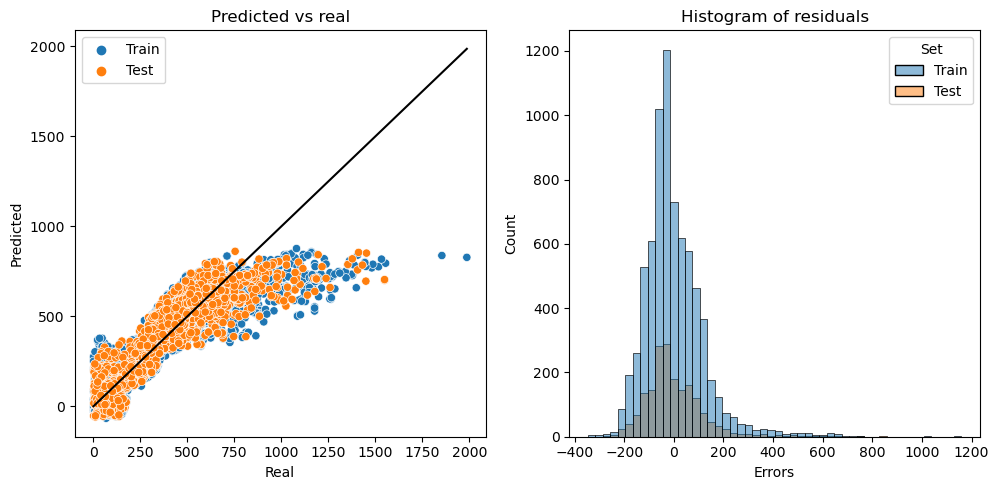

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()